In [379]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [380]:
profiles = pd.read_csv("CSV Files/customer_profiles.csv")
details = pd.read_csv("CSV Files/ad_details.csv")
events = pd.read_csv("CSV Files/ad_events.csv")

In [381]:
events = events.drop_duplicates(subset='customer', keep='first')

df = pd.merge(profiles, events, left_on='id', right_on='customer', how='outer')

df = df.drop('id', axis=1)

df.insert(0, 'id', df.pop('customer'))

df = df.fillna(df.median())

In [382]:
for col in df.drop(['id'], axis=1).columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [383]:
times = pd.to_datetime(df['became_member_on (year month day)'], format='%Y%m%d')

In [384]:
years = []
months = []
days = []
for time in times:
    years.append(time.year)
    months.append(time.month)
    days.append(time.day)

In [385]:
df["day"] = days
df["month"] = months
df["year"] = years

In [386]:
df = df.drop('became_member_on (year month day)', axis=1)

In [387]:
scaler = StandardScaler()
data = scaler.fit_transform(df.drop(['id'], axis=1))
data = pd.DataFrame(data)

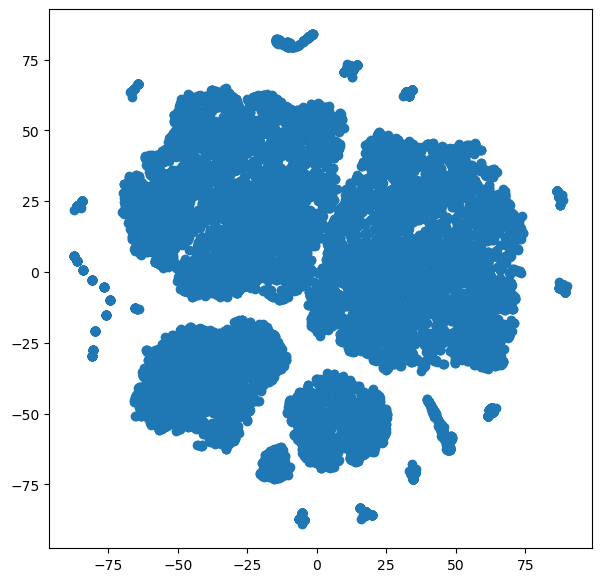

In [388]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [389]:
error = []
for n_clusters in range(1, 16):
    model = KMeans(init='k-means++',n_clusters=n_clusters,max_iter=1000,random_state=0)
    model.fit(tsne_data)
    error.append(model.inertia_)

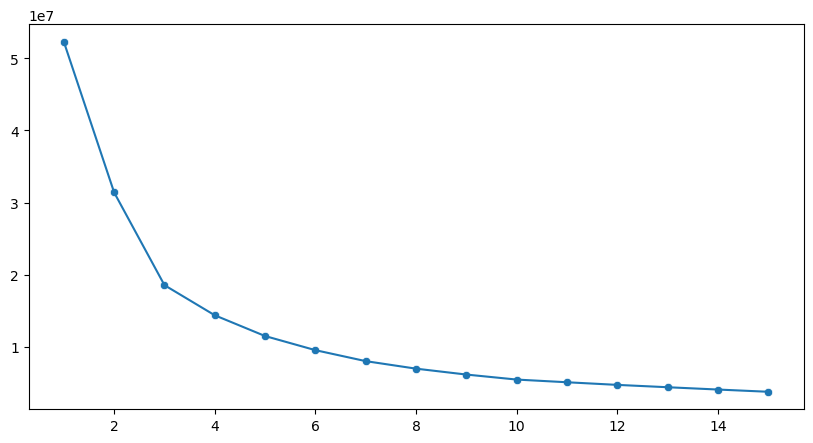

In [390]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 16), y=error)
sns.scatterplot(x=range(1, 16), y=error)
plt.show()

In [391]:
model = KMeans(init='k-means++', n_clusters=3)
segments = model.fit_predict(tsne_data)

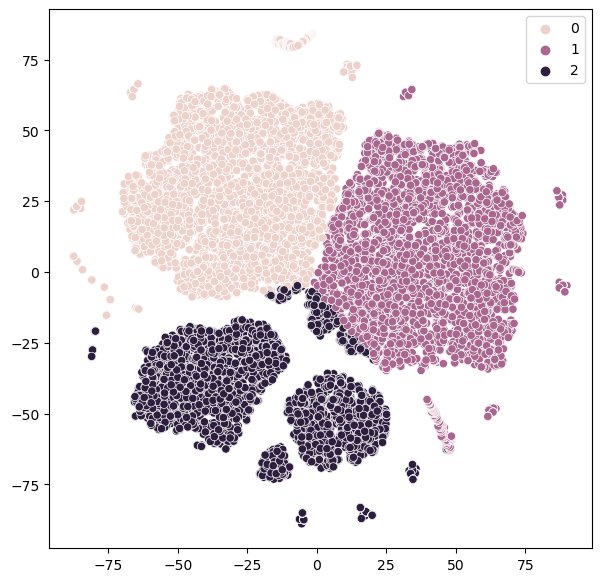

In [392]:
plt.figure(figsize=(7, 7))
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue=segments)
plt.show()

In [393]:
labels = model.labels_

In [395]:
sc = metrics.silhouette_score(tsne_data, labels)
print("Silhouette Coefficient:%0.4f" % sc)

Silhouette Coefficient:0.4277
